In [3]:
import numpy as np


def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix1 = read_matrix_from_file("matrix1.txt")
matrix2 = read_matrix_from_file("matrix2.txt")
result_matrix_cpp = read_matrix_from_file("result_matrix.txt")

result_matrix_numpy = np.dot(matrix1, matrix2)

if np.array_equal(result_matrix_numpy, result_matrix_cpp):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты совпадают


In [34]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import pandas as pd


def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            tmp = []
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            task_size = int(file.readline().strip())
            for i in range(0, 10):
                comp_time = file.readline().strip()
                if not comp_time:
                    break
                tmp.append(int(comp_time))

            sizes.append(size)
            computation_times.append(tmp)
    return sizes, computation_times


def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.grid(True)
    plt.show()


def get_intervals(computation_times):
    gamma = 0.95
    intervals = []
    for time in computation_times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return intervals



sizes, computation_times = read_results("stats_4.txt")
arr = pd.DataFrame({"sizes":sizes, "times":computation_times})
intervals = get_intervals(computation_times)

In [35]:
arr

,sizes,times
0,100,"[51, 68, 43, 59, 56, 52, 40, 53, 45, 41]"
1,200,"[189, 161, 165, 151, 162, 171, 169, 188, 159, ..."
2,300,"[345, 348, 372, 318, 361, 322, 341, 347, 347, ..."
3,400,"[598, 642, 590, 627, 624, 626, 611, 618, 627, ..."
4,500,"[992, 1015, 979, 963, 1010, 1027, 1055, 985, 9..."
5,600,"[1521, 1577, 1522, 1539, 1474, 1483, 1556, 149..."
6,700,"[2145, 2127, 2226, 2346, 2094, 2167, 2158, 214..."
7,800,"[2884, 3064, 3323, 3043, 2944, 3056, 3180, 294..."
8,900,"[3884, 4225, 4130, 3922, 3699, 4026, 3977, 373..."
9,1000,"[5598, 5463, 5341, 5419, 5270, 5389, 5265, 562..."


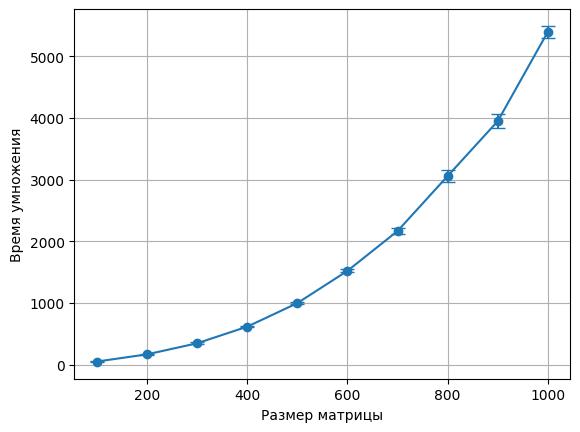

In [37]:

plot_intervals(sizes, intervals)